In [1]:
import os

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import loadmat
from matplotlib import colors

In [3]:
path = os.path.expanduser(f"~/storage1/projects/IPP_WANG/src/interareal/")

In [4]:
area_names = ['V1','V2','V4','DP','MT','8m','5','8l','TEO','2','F1','STPc','7A','46d','10','9/46v',\
        '9/46d','F5','TEpd','PBr','7m','7B','F2','STPi','PROm','F7','8B','STPr','24c']
nareas = len(area_names)
iter_ = range(nareas)

### Connectivity weights FLN

In [5]:
data = np.load(os.path.join(path, "markov2014.npy"), allow_pickle=True).all()

In [6]:
FLN, Distances, Hierarchy = data["FLN"], data["Distances"], data["Hierarchy"]

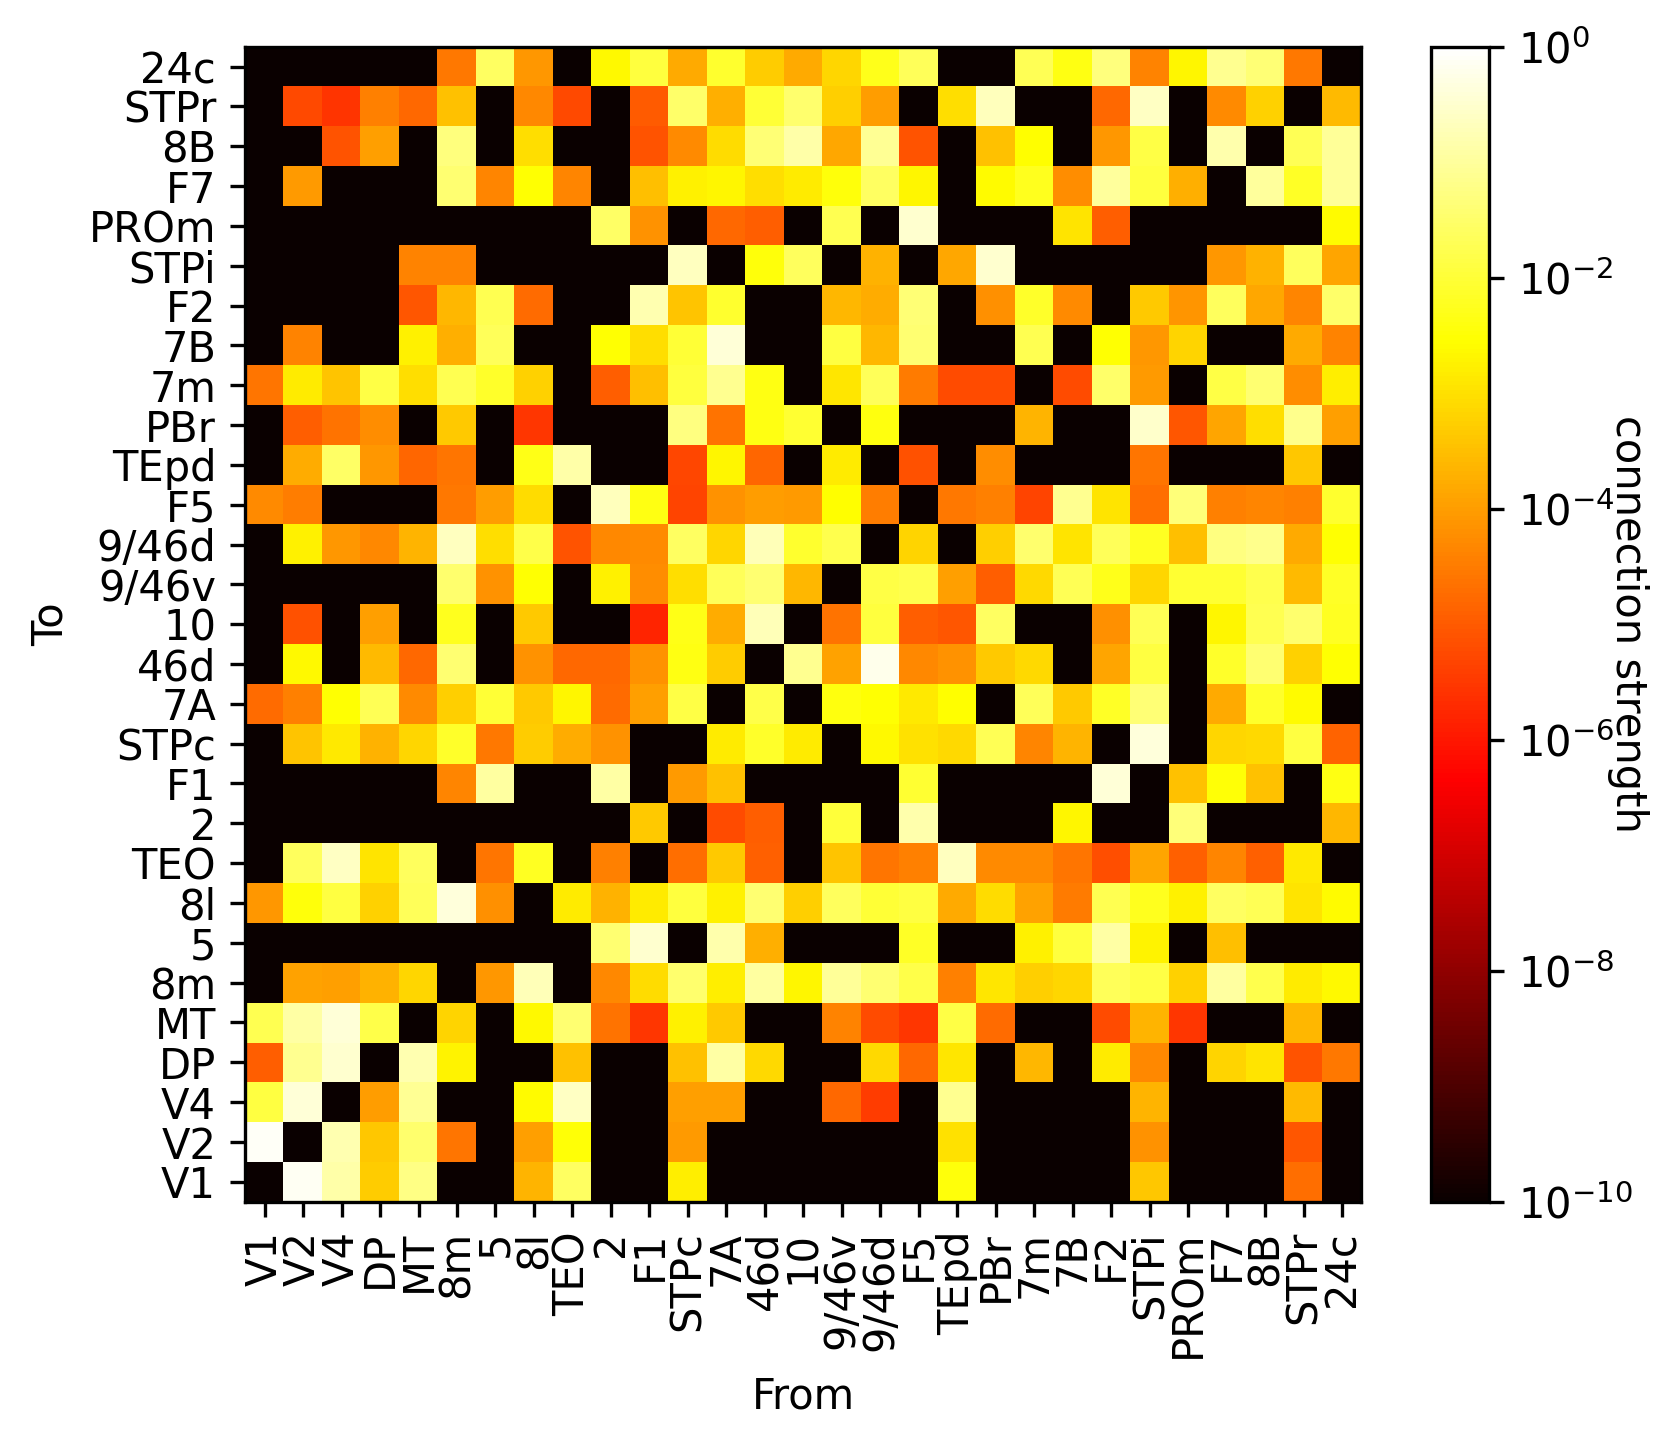

In [13]:
plt.figure(figsize=(6, 5), dpi=300)

im = plt.imshow(FLN + 1e-10, aspect="auto", origin="lower", cmap="hot", norm=colors.LogNorm(vmin=1e-10, vmax=1) )
cbar = plt.colorbar(im)
cbar.set_label('connection strength', rotation=270)
plt.xticks(iter_, area_names, rotation=90);
plt.yticks(iter_, area_names);
plt.xlabel("From")
plt.ylabel("To")

plt.savefig("figures/logFLN.pdf")

In [8]:
"""
plt.figure(figsize=(6, 5), dpi=300)
logFLN = np.log(FLN)
masked_array = np.ma.array(logFLN, mask=np.isnan(logFLN))
cmap = matplotlib.cm.get_cmap("hot").copy()
cmap.set_bad('black')
plt.imshow(logFLN, aspect="auto", origin="lower", cmap=cmap)
cbar = plt.colorbar()
cbar.set_label('log(FLN)', rotation=270)
plt.xticks(iter_, area_names, rotation=90);
plt.yticks(iter_, area_names);
plt.xlabel("From")
plt.ylabel("To")

plt.savefig("figures/logFLN.eps")
""";

/tmp/ipykernel_297767/2489485802.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap("copper").copy()


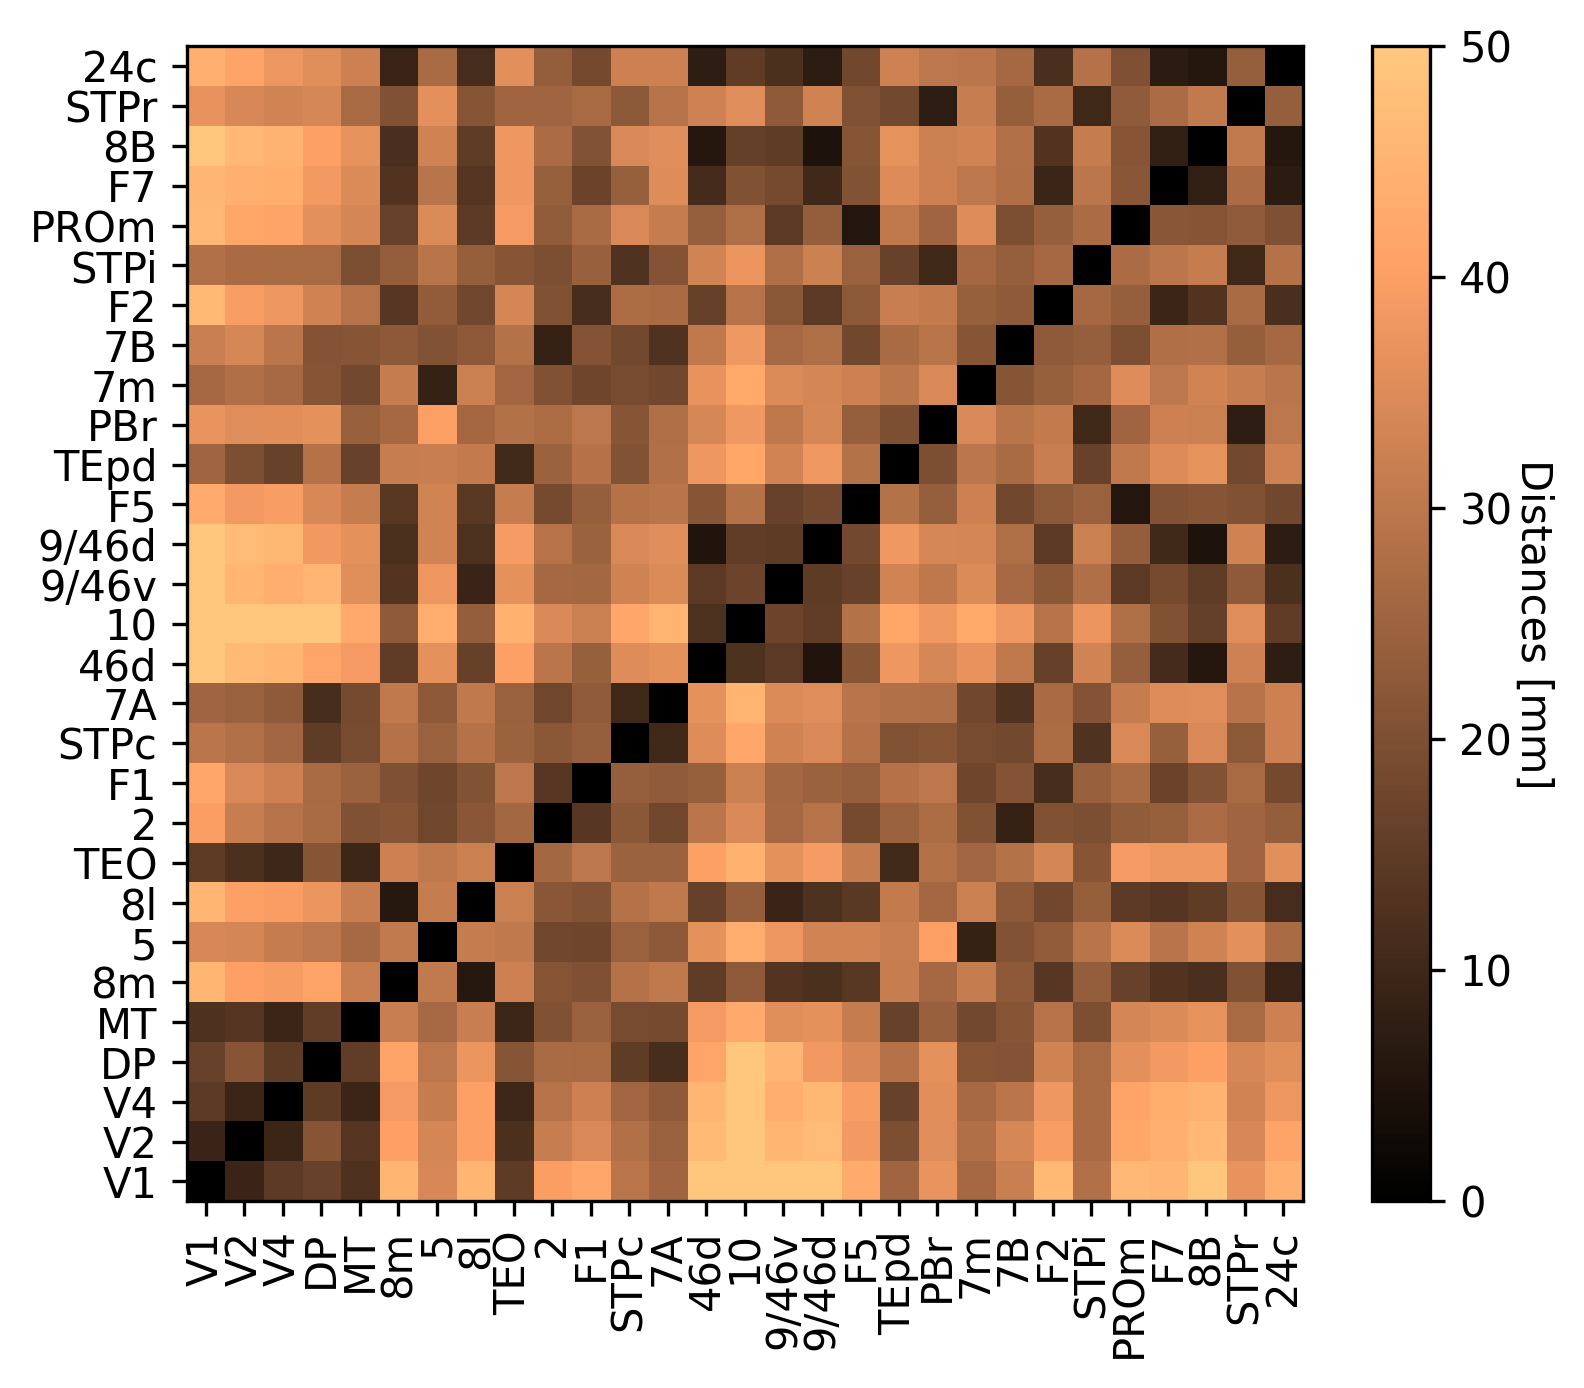

In [9]:
plt.figure(figsize=(6, 5), dpi=300)
masked_array = np.ma.array(Distances, mask=np.isnan(Distances))
cmap = matplotlib.cm.get_cmap("copper").copy()
cmap.set_bad('black')
plt.imshow(Distances, aspect="auto", origin="lower", cmap=cmap, vmin=0, vmax=50)
cbar = plt.colorbar()
cbar.set_label('Distances [mm]', rotation=270, labelpad=10)
plt.xticks(iter_, area_names, rotation=90);
plt.yticks(iter_, area_names);


plt.savefig("figures/Distances.pdf")

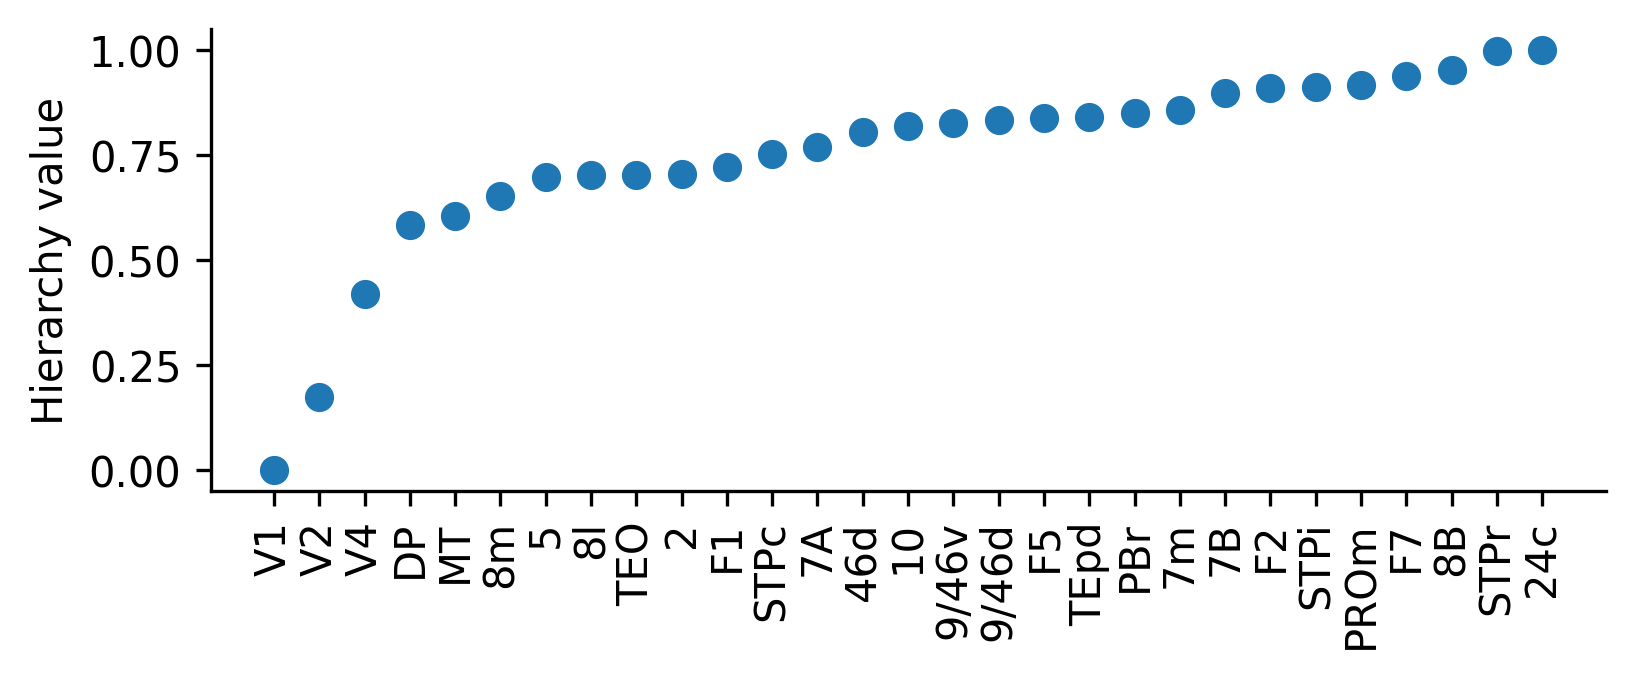

In [10]:
plt.figure(figsize=(6, 2), dpi=300)
ax = plt.subplot(111)
plt.plot(Hierarchy, "o")
plt.xticks(iter_, area_names, rotation=90);
plt.ylabel("Hierarchy value")
[ax.spines[key].set_visible(False) for key in ["top", "right"]]
plt.savefig("figures/Hierarchy.pdf")